<a href="https://colab.research.google.com/github/Dharneeshcr7/PearlHacks2021/blob/master/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import tarfile
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Conv2DTranspose, Concatenate
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import backend as K
from keras.utils import plot_model
import tensorflow as tf
from IPython.display import clear_output

In [45]:
sz = (192, 160)
sz = sz[::-1] + (3,)
print(sz)

(160, 192, 3)


In [46]:
def create_unet():
        s = Input(sz)
        c1 = Conv2D(8, 3, activation='relu', padding='same') (s)
        c1 = Conv2D(8, 3, activation='relu', padding='same') (c1)
        p1 = MaxPooling2D() (c1)
        c2 = Conv2D(16, 3, activation='relu', padding='same') (p1)
        c2 = Conv2D(16, 3, activation='relu', padding='same') (c2)
        p2 = MaxPooling2D() (c2)
        c3 = Conv2D(32, 3, activation='relu', padding='same') (p2)
        c3 = Conv2D(32, 3, activation='relu', padding='same') (c3)
        p3 = MaxPooling2D() (c3)
        c4 = Conv2D(64, 3, activation='relu', padding='same') (p3)
        c4 = Conv2D(64, 3, activation='relu', padding='same') (c4)
        p4 = MaxPooling2D() (c4)
        c5 = Conv2D(128, 3, activation='relu', padding='same') (p4)
        c5 = Conv2D(128, 3, activation='relu', padding='same') (c5)
        u6 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same') (c5)
        u6 = Concatenate(axis=3)([u6, c4])
        c6 = Conv2D(64, 3, activation='relu', padding='same') (u6)
        c6 = Conv2D(64, 3, activation='relu', padding='same') (c6)
        u7 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same') (c6)
        u7 = Concatenate(axis=3)([u7, c3])
        c7 = Conv2D(32, 3, activation='relu', padding='same') (u7)
        c7 = Conv2D(32, 3, activation='relu', padding='same') (c7)
        u8 = Conv2DTranspose(16, 2, strides=(2, 2), padding='same') (c7)
        u8 = Concatenate(axis=3)([u8, c2])
        c8 = Conv2D(16, 3, activation='relu', padding='same') (u8)
        c8 = Conv2D(16, 3, activation='relu', padding='same') (c8)
        u9 = Conv2DTranspose(8, 2, strides=(2, 2), padding='same') (c8)
        u9 = Concatenate(axis=3)([u9, c1])
        c9 = Conv2D(8, 3, activation='relu', padding='same') (u9)
        c9 = Conv2D(8, 3, activation='relu', padding='same') (c9)
        outputs = Conv2D(1, 1, activation='sigmoid') (c9)
        model = Model(inputs=[s], outputs=[outputs])

        model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = [mean_iou])
        return model
def mean_iou(y_true, y_pred):
    yt0 = y_true[:,:,:,0]
    yp0 = K.cast(y_pred[:,:,:,0] > 0.5, 'float32')
    inter = tf.math.count_nonzero(tf.logical_and(tf.equal(yt0, 1), tf.equal(yp0, 1)))
    union = tf.math.count_nonzero(tf.add(yt0, yp0))
    iou = tf.where(tf.equal(union, 0), 1., tf.cast(inter/union, 'float32'))
    return iou

In [47]:
model=create_unet()
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 160, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_114 (Conv2D)            (None, 160, 192, 8)  224         ['input_7[0][0]']                
                                                                                                  
 conv2d_115 (Conv2D)            (None, 160, 192, 8)  584         ['conv2d_114[0][0]']             
                                                                                                  
 max_pooling2d_24 (MaxPooling2D  (None, 80, 96, 8)   0           ['conv2d_115[0][0]']       

In [48]:
weights_path = 'unet.h5'  # Replace with the actual path
model.load_weights(weights_path)

In [49]:
import cv2
ar=cv2.imread('Hand_0000179.jpg')
ar = cv2.resize(ar, (192,160))
ar.shape

(160, 192, 3)

In [52]:

X_test = []
X_test.append(ar)
X_test = np.array(X_test).astype('float32')
X_test /= 255

mask=model.predict(X_test)

1/1 [==============================] - 0s 100ms/step


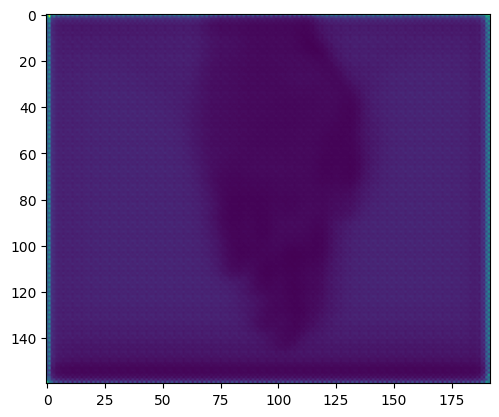

In [54]:
%matplotlib inline
plt.imshow(ar)
plt.imshow(mask[0,:,:,0])